# Group 36 - Glass Prediction Project Proposal

### Introduction

Different elements and variations in refractive index play a critical role in the formulation and properties of various types of glass. With this information, we are able to predict which glass is most likely to form with the elements presented and the refractive index. 

We want to answer the question of: \
**To predict the type of glass of an unknown glass sample with KNN model trained with our dataset.**

The dataset is composed of the refractive index as well as eight different elements to represent the type of glass the combination of those elements and refractive index represent. 

### Glass Dataset

**Type of Glass** \
1 : Building Windows (float-processed) \
2 : Building Windows (non-float-processed) \
3 : Vehicle Windows (float-processed) \
4 : Vehicle Windows (non-float-processed) *none in this dataset* \
5 : Containers \
6 : Tableware \
7 : Headlamps 

Source: German,B.. (1987). Glass Identification. UCI Machine Learning Repository. https://doi.org/10.24432/C5WW2P.

In [12]:
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
options(repr.matrix.max.rows = 6)
library(RColorBrewer)
library("ggplot2")

In [13]:
#Read in dataset
names <- c("ID", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type")
glass <- read.csv(url("http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"), header=FALSE)
colnames(glass) = names
glass <- glass |> select(-ID) |> mutate(Type = as_factor(Type))
glass

RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0,1
1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0,1
1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1.52065,14.36,0,2.02,73.42,0,8.44,1.64,0,7
1.51651,14.38,0,1.94,73.61,0,8.48,1.57,0,7
1.51711,14.23,0,2.08,73.36,0,8.62,1.67,0,7


In [14]:

glass_split <- initial_split(glass, prop = 0.75, strata = Type)
glass_train <- training(glass_split)
glass_test <- testing(glass_split)

In [15]:
#Summarize Data into at least one table

glass_mean <- glass |>
    group_by(Type) |>
    summarize(across(everything(), mean))
glass_mean


glass_type <- glass |> count(Type)
glass_type

Type,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.518718,13.24229,3.5524286,1.163857,72.61914,0.4474286,8.797286,0.012714286,0.05700000
2,1.518619,13.11171,3.0021053,1.408158,72.59803,0.5210526,9.073684,0.050263158,0.07973684
3,1.517964,13.43706,3.5435294,1.201176,72.40471,0.4064706,8.782941,0.008823529,0.05705882
5,1.518928,12.82769,0.7738462,2.033846,72.36615,1.4700000,10.123846,0.187692308,0.06076923
6,1.517456,14.64667,1.3055556,1.366667,73.20667,0.0000000,9.356667,0.000000000,0.00000000
7,1.517116,14.44207,0.5382759,2.122759,72.96586,0.3251724,8.491379,1.040000000,0.01344828


Type,n
<fct>,<int>
1,70
2,76
3,17
5,13
6,9
7,29


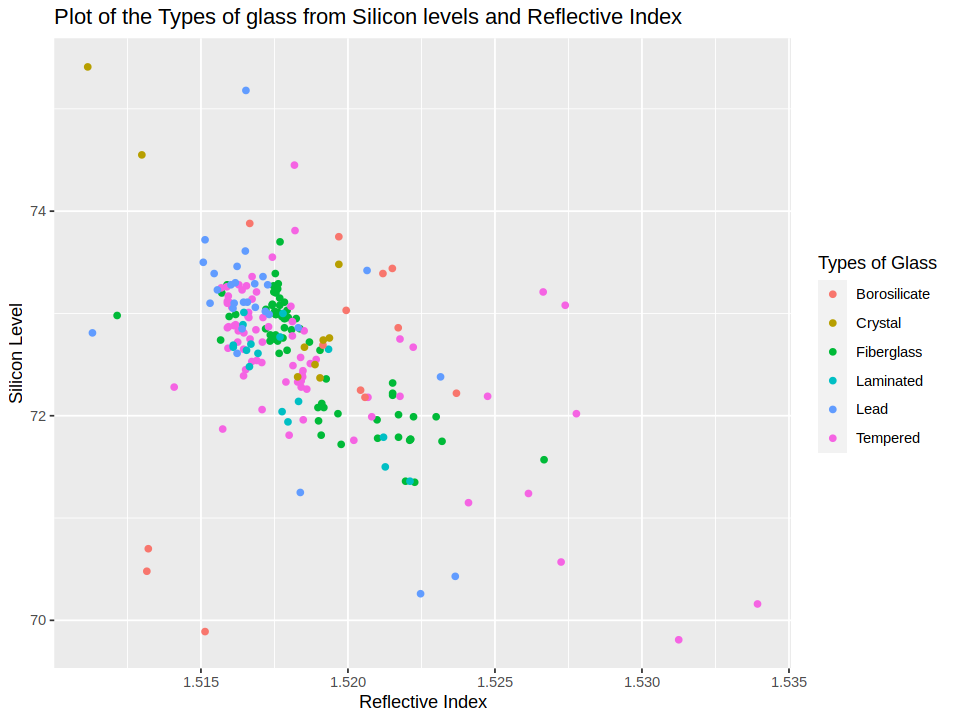

In [17]:
#Naming the Types of glass 
glass_name <- mutate(glass, Type = case_when(
    Type == 1 ~ " Building Windows (float-processed)",
    Type == 2 ~ " Building Windows (non-float-processed)",
    Type == 3 ~ " Vehicle Windows (float-processed)",
    Type == 4 ~ " Vehicle Windows (non-float-processed)",
    Type == 5 ~ "Containers",
    Type == 6 ~ "Tableware",
    Type == 7 ~ "Lead"))
#Visualize the data into at least one plot relevant
options(repr.plot.width = 8, repr.plot.height = 6) 

ri_si_plot <- ggplot(glass_name, aes(x = RI, y = Si, group = Type)) +
    geom_point(aes(color = Type)) +
    labs(title = "Plot of the Types of glass from Silicon levels and Reflective Index", 
            x = "Reflective Index",
            y = "Silicon Level",
            color = "Types of Glass")

           
ri_si_plot